In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
# reading image and its parameters

imgColor = cv2.imread('monument1.png')
imgColor = cv2.cvtColor(imgColor, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
height = img.shape[0]
width = img.shape[1]
print(width,height)

1280 498


In [3]:
# calculating x and y gradient

Ix = np.zeros((img.shape))
Iy = np.zeros((img.shape))

for i in range(height-1):
    for j in range(width-1):
        Iy[i][j] = img[i][j]-img[i+1][j]
        Ix[i][j] = img[i][j]-img[i][j+1]

/home/anuj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
/home/anuj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


In [4]:
Ixx = np.multiply(Ix,Ix)
Iyy = np.multiply(Iy,Iy)
Ixy = np.multiply(Iy,Ix)

In [5]:
k = 0.04                                                    # set k value as 0.04

H = np.zeros((img.shape))
Shi = np.zeros((img.shape))

offset = 2
for i in range(offset,height-offset):
    for j in range(offset,width-offset):
        Sumxx = np.sum(Ixx[i-offset:i+offset+1,j-offset:j+offset+1])                  #window size = 5
        Sumyy = np.sum(Iyy[i-offset:i+offset+1,j-offset:j+offset+1])
        Sumxy = np.sum(Ixy[i-offset:i+offset+1,j-offset:j+offset+1])
        
        M = np.array([[Sumxx,Sumxy],[Sumxy,Sumyy]])
        R = np.linalg.det(M) - k*(M.trace()**2)              # calculating R value
        
        w,v = np.linalg.eig(M)

        minval = min(w)
        Shi[i][j] = minval                                   # matrix for shi thomasi
        H[i][j] = R                                          # matrix for harris

In [6]:
def Harris(H):
    maxV = H.max()
    th = 0.6*maxV              # deciding threshold to detect key-points

    for i in range(1,height-1):
        for j in range(1,width-1):
            if(H[i][j]>th):                                      # selecting key-points
                cv2.circle(imgColor, (j, i), 1, (255,0,0), 1)
    plt.figure(figsize=(20,5))
    plt.imshow(imgColor.astype('uint8'),cmap='gray')        # show image with harris key-points in red color
    plt.savefig('harris.png',format = "png", dpi = 300)
    plt.show()

In [7]:
def ShiThomasi(Shi):
    maxVal = Shi.max()
    thH = 0.6*maxVal                     

    for i in range(1,height-1):
        for j in range(1,width-1):
            if(Shi[i][j]>thH):                                    # selecting key-points
                cv2.circle(imgColor, (j, i), 1, (0,255,0), 1)
    plt.figure(figsize=(20,5))
    plt.imshow(imgColor.astype('uint8'),cmap='gray') # show image with shi-thomasi key-points in green color
    plt.savefig('harris_and_shiThomasi.png',format = "png", dpi = 300)
    plt.show() 
    

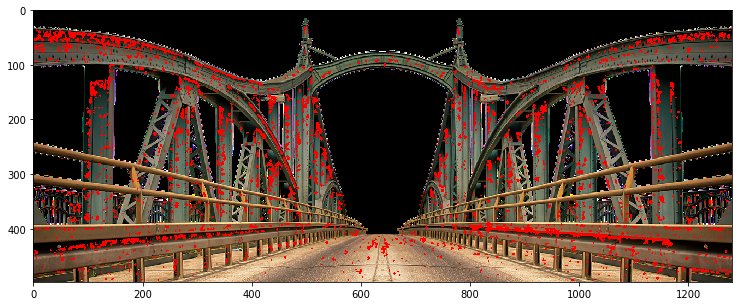

In [8]:
Harris(H)

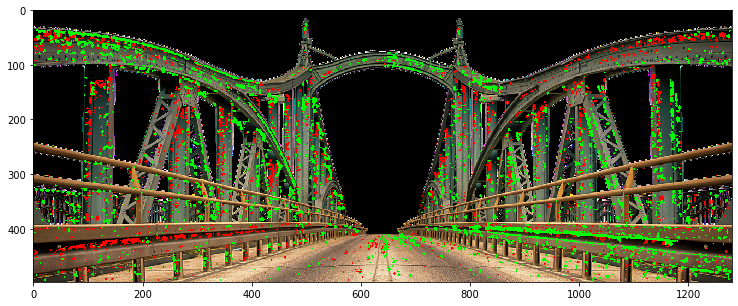

In [9]:
ShiThomasi(Shi)